In [ ]:
#!pip install keras-visualizer --upgrade


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import BinaryCrossentropy
from keras_visualizer import visualizer


In [ ]:
data = load_breast_cancer()

In [ ]:
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
y_cat = to_categorical(data['target'])

In [ ]:
y_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['data'], y_cat, test_size = 0.2)

In [ ]:
y_train.shape[1]

2

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455, 2), (114, 2))

In [ ]:
model  = Sequential()
#Hidden Layer 1
model.add(Dense(100, input_shape=(x_train.shape[1],), activation = 'sigmoid'))
#Hidden Layer 2
model.add(Dense(100, activation = 'sigmoid'))
#Hidden Layer 3
model.add(Dense(50, activation = 'sigmoid'))
#Output Layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
sgd_optimizer = SGD()
binary_loss = BinaryCrossentropy()

In [ ]:
model.compile(optimizer = sgd_optimizer, loss = binary_loss, metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,352 (71.69 KB)

 Trainable params: 18,352 (71.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
visualizer(model, file_name='graph_classification', file_format='png', view=False, settings=None)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test) ,verbose=1)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6428 - loss: 0.6970 - val_accuracy: 0.7105 - val_loss: 0.6360
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6608 - val_accuracy: 0.7105 - val_loss: 0.6227
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6422 - loss: 0.6497 - val_accuracy: 0.7105 - val_loss: 0.6248
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6246 - loss: 0.6581 - val_accuracy: 0.7105 - val_loss: 0.6216
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5881 - loss: 0.6707 - val_accuracy: 0.7105 - val_loss: 0.6186
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6143 - loss: 0.6597 - val_accuracy: 0.7105 - val_loss: 0.6180
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6159 - loss: 0.6589 - val_accuracy: 0.7105 - val_loss: 0.6204
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5941 - loss: 0.6677 - val_accuracy: 0.7105 - v

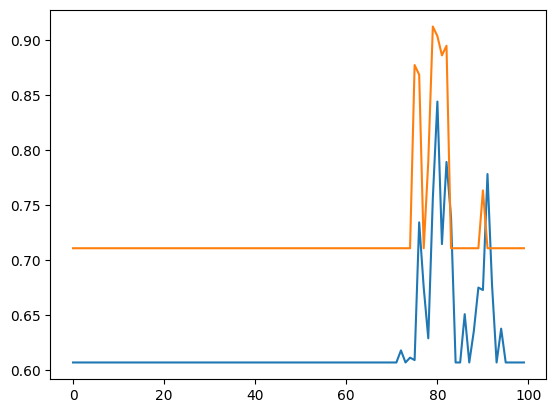

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [ ]:
model.evaluate(x_train, y_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6266 - loss: 0.5305 


[0.5370582938194275, 0.6065934300422668]

In [ ]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7332 - loss: 0.4921 


[0.5063679814338684, 0.7105262875556946]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_test_pred = np.argmax(model.predict(x_test), axis = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.16049302, 0.839507  ],
       [0.16411409, 0.8358858 ],
       [0.16362625, 0.83637375],
       [0.4816596 , 0.51834047],
       [0.4725139 , 0.5274861 ],
       [0.14895187, 0.8510482 ],
       [0.1636206 , 0.8363793 ],
       [0.4816596 , 0.51834047],
       [0.4816596 , 0.51834047],
       [0.16361168, 0.8363884 ],
       [0.1636178 , 0.8363822 ],
       [0.1257465 , 0.8742535 ],
       [0.13270639, 0.86729354],
       [0.16622175, 0.8337782 ],
       [0.13477215, 0.8652278 ],
       [0.16361219, 0.8363878 ],
       [0.16362268, 0.8363773 ],
       [0.16365276, 0.8363472 ],
       [0.13022324, 0.8697767 ],
       [0.16361785, 0.8363822 ],
       [0.16361259, 0.8363874 ],
       [0.16367355, 0.8363265 ],
       [0.16362117, 0.8363787 ],
       [0.4816596 , 0.51834047],
       [0.16362132, 0.8363787 ],
       [0.16362607, 0.8363739 ],
       [0.16339053, 0.8366094 ],
       [0.24406105, 0.755939  ],
       [0.16361216, 0.8363879 ],
       [0.48165596, 0.51834404],
       [0.

In [ ]:
y_test_actual = np.argmax(y_test, axis = 1)

In [ ]:
confusion_matrix(y_test_actual, y_test_pred)

array([[ 0, 33],
       [ 0, 81]])

In [ ]:
print(classification_report(y_test_actual, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.71      1.00      0.83        81

    accuracy                           0.71       114
   macro avg       0.36      0.50      0.42       114
weighted avg       0.50      0.71      0.59       114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
